In [51]:
import pandas as pd
from scipy.stats import pearsonr as pc
from sklearn.model_selection import train_test_split
import math as m
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# STEP 1,2,3

def fill_all_missing(df):
  for (columnName, columnData) in df.iteritems():
    if (columnData.isnull().values.any() == True):
      median = int(df[columnName].median())
      df[columnName].fillna(median, inplace=True)
  print(" ---------------------------------------- ")


df = pd.read_csv("HappinessData.csv")

# Fill missing data
fill_all_missing(df)

# Get label column
label_column_title = 'Unhappy/Happy'
label_column = df.pop(label_column_title)

# Added the label column to the end of the dataset
df.insert(len(df.columns), label_column_title, label_column)

print(df.head())



 ---------------------------------------- 
   City Services Availability  Housing Cost  Quality of schools  \
0                           5             3                 3.0   
1                           5             3                 3.0   
2                           4             3                 3.0   
3                           4             1                 3.0   
4                           3             2                 4.0   

   Community trust in local police  Community Maintenance  \
0                              3.0                      5   
1                              3.0                      5   
2                              3.0                      4   
3                              4.0                      4   
4                              4.0                      4   

   Availability of Community Room   Unhappy/Happy  
0                                3              1  
1                                3              0  
2                              

In [52]:
# Pearsons Correlation - STEP 4
cors = []
for (columnName, columnData) in df.iteritems():
  cors.append(pc(columnData, label_column)[0])
cors.pop()

print(cors)

[0.3186738565599665, 0.029135851491046496, 0.18051569017860802, 0.13771681575799297, 0.214967330343903, 0.22457485552847423]


In [53]:
# split dataset - THIS SHUFFLE AGAIN ONCE COMPILE 
train, test = train_test_split(df, test_size=0.2)

Performance of self implementation
              precision    recall  f1-score   support

         0.0       0.54      0.44      0.48        16
         1.0       0.40      0.50      0.44        12

    accuracy                           0.46        28
   macro avg       0.47      0.47      0.46        28
weighted avg       0.48      0.46      0.47        28

[[7 9]
 [6 6]]
Accuracy rate of knn implementation:  0.46
error rate 0.5357142857142857
please wait for 30 sec...


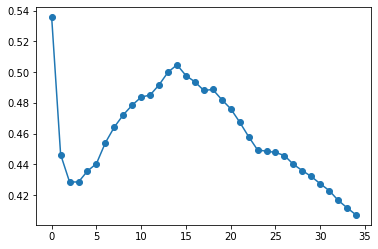

In [54]:
# calculate the Euclidean distance - STEP 5
def euclidean_distance(row1 : pd.Series, row2 : pd.Series):
  distance = 0.0
  # print(row1)
  for a in range(0,len(row1)-1):
    distance+=((row1[a] - row2[a])**2)
  # print(distance)
  # print(m.sqrt(distance))
  return m.sqrt(distance)  

def get_neighbors(train : pd.DataFrame, test_row, k):
  distances = []
  for i in range(0, len(train)):
    dist = euclidean_distance(train.iloc[i], test_row)
    distances.append((dist, train.  iloc[i][6]))
  distances.sort()
  # print(distances[0:3][0], "and", distances[0:3][1])
  return distances[0:k]

# Get the desired number of neighbors and predict
def predict(train_set, new_rec, k=5):
  neighbors = get_neighbors(train_set, new_rec, k)
  categories = [0,0]
  for neighbor in neighbors:
    # print(neighbor[1])
    categories[int(neighbor[1])]+=1
  # print(categories.index(max(categories)))
  return categories.index(max(categories))

def accuracy_prob(train_y, test_y):
  right = 0.0
  for i in range(0, len(train_y)):
    if (train_y[i] == test_y[i]):
      right+=1
  return (right)/len(train_y)

# train the implemented model with k = 5
train_y_implemented = []
test_y_implemented = []
for i in range(0, len(test)):
  prediction = predict(train, test.iloc[i])
  train_y_implemented.append(prediction)
  test_y_implemented.append(test.iloc[i][6])


print("Performance of self implementation")
print(classification_report(test_y_implemented, train_y_implemented))
print(confusion_matrix(test_y_implemented, train_y_implemented))
p = accuracy_prob(train_y_implemented, test_y_implemented)
print("Accuracy rate of knn implementation: ", "{:.2f}".format(p))
error_rate_implemented = 1 - p
print("error rate" , error_rate_implemented)

# train with k = 5 to k = 15
error_rates_implemented = []
train_y_implemented = []
test_y_implemented = []
print("please wait for 30 sec...")

for k in range(5, 40):
  for i in range(0, len(test)):
    prediction = predict(train, test.iloc[i], k)
    train_y_implemented.append(prediction)
    test_y_implemented.append(test.iloc[i][6])
  p = accuracy_prob(train_y_implemented, test_y_implemented)
  error_rates_implemented.append(1 - p)

plt.plot(error_rates_implemented, marker="o")



Performance of sklearn
              precision    recall  f1-score   support

           0       0.55      0.38      0.44        16
           1       0.41      0.58      0.48        12

    accuracy                           0.46        28
   macro avg       0.48      0.48      0.46        28
weighted avg       0.49      0.46      0.46        28

[[ 6 10]
 [ 5  7]]
Accuracy rate of sklearn knn:  0.46
error rate 0.5357142857142857


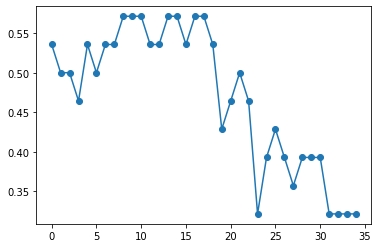

In [55]:
# Scikit-learn version - STEP 6
from sklearn.neighbors import KNeighborsClassifier

train_x = train.loc[:, train.columns != 'Unhappy/Happy']
train_y = train['Unhappy/Happy']
test_x = test.loc[:, test.columns != 'Unhappy/Happy']
test_y = test['Unhappy/Happy'].to_list()

# train the model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)

# get prediction
prediction_knn = knn.predict(test_x).tolist()

print("Performance of sklearn")
print(classification_report(test_y, prediction_knn))
print(confusion_matrix(test_y, prediction_knn))
p_knn = accuracy_prob(test_y, prediction_knn)
print("Accuracy rate of sklearn knn: ", "{:.2f}".format(p_knn))
error_rate_knn = 1 - p_knn
print("error rate" , error_rate_knn)

# train the knn model with k = 5 to k = 15
error_rates_knn = []
for i in range(5, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    prediction_knn = knn.predict(test_x).tolist()
    p_knn = accuracy_prob(test_y, prediction_knn)
    error_rates_knn.append(1-p_knn)

plt.plot(error_rates_knn, marker="o")